The **DBSCAN algorithm** conceptualizes clusters as regions of high density separated by regions of low density. In contrast to k-means, which assumes clusters are convex-shaped, DBSCAN identifies clusters of arbitrary shapes. The fundamental concept in DBSCAN is that of *core samples*, representing points in high-density areas. A cluster, therefore, consists of core samples, each closely located to others (measured by a specified distance), along with non-core samples that are in proximity to a core sample but are not core samples themselves.

Two crucial parameters, `min_samples` and `eps`, play a pivotal role in the algorithm, formalizing the notion of density. Higher `min_samples` or lower `eps` values indicate a higher density requirement for cluster formation.

Formally, a core sample is a dataset point for which a minimum of `min_samples` other points exist within a distance of `eps`, identified as neighbors of the core sample. This definition characterizes the core sample as being in a dense region of the vector space. A cluster is a group of core samples constructed by recursively considering a core sample, identifying all its core sample neighbors, identifying their core sample neighbors, and so forth. In addition to core samples, a cluster includes non-core samples, which are neighbors of core samples within the cluster but are not themselves core samples. Intuitively, these samples are on the outskirts of a cluster.

By definition, any core sample is part of a cluster. Any sample not classified as a core sample and is at least `eps` in distance from any core sample is considered an outlier by the algorithm.

The **DBSCAN algorithm** is deterministic, consistently producing the same clusters when presented with the same data in the same order. However, variations in the order of data input can lead to differing results. Firstly, although core samples will consistently be assigned to the same clusters, the labels of those clusters depend on the order in which the samples are encountered in the data. Secondly, and more notably, the clusters to which non-core samples are assigned can vary based on the data order.

This discrepancy arises when a non-core sample has a distance lower than `eps` to two core samples in different clusters. According to the triangular inequality, those two core samples must be more distant than `eps` from each other, or they would be in the same cluster. The non-core sample is assigned to whichever cluster is generated first in a pass through the data, leading to results dependent on the data ordering.

For further exploration, you can refer to the [DBSCAN example](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py) in the scikit-learn documentation.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Iris dataset

In [3]:
iris_dataset = load_iris()
X = iris_dataset.data
y = iris_dataset.target

# Split the data into training and test sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction

In [6]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Visualize the clusters for training data

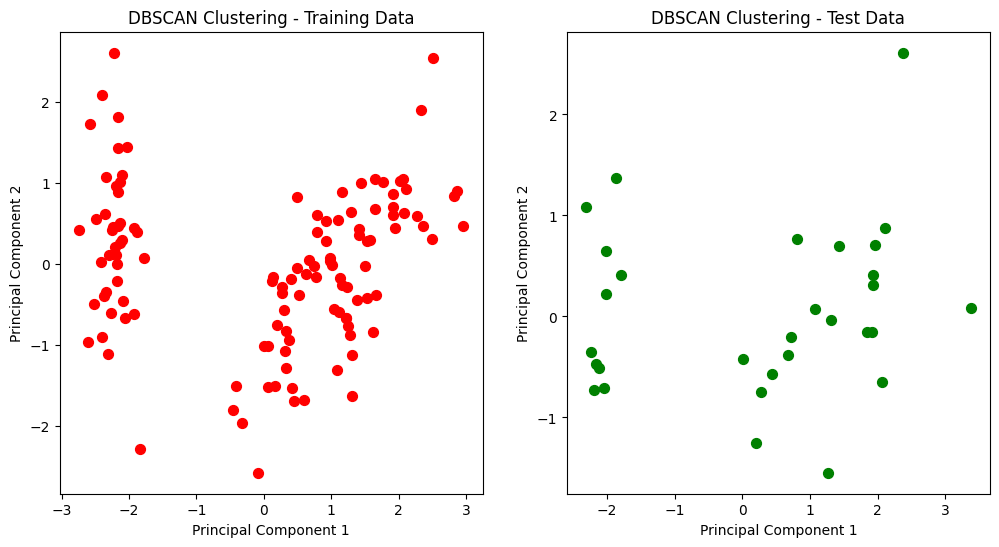

In [9]:


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c='r', s=50)
plt.title('DBSCAN Clustering - Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Visualize the clusters for test data
plt.subplot(1, 2, 2)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c='g', s=50)
plt.title('DBSCAN Clustering - Test Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

# Initialize DBSCAN with epsilon (eps) and minimum samples

In [10]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the DBSCAN model on the training data

In [11]:
train_labels = dbscan.fit_predict(X_train_scaled)

# Assign the cluster labels to the test data

In [13]:
test_labels = dbscan.fit_predict(X_test_scaled)
print(test_labels)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  0 -1 -1 -1 -1 -1 -1  0 -1 -1 -1
 -1 -1 -1 -1  0  0]


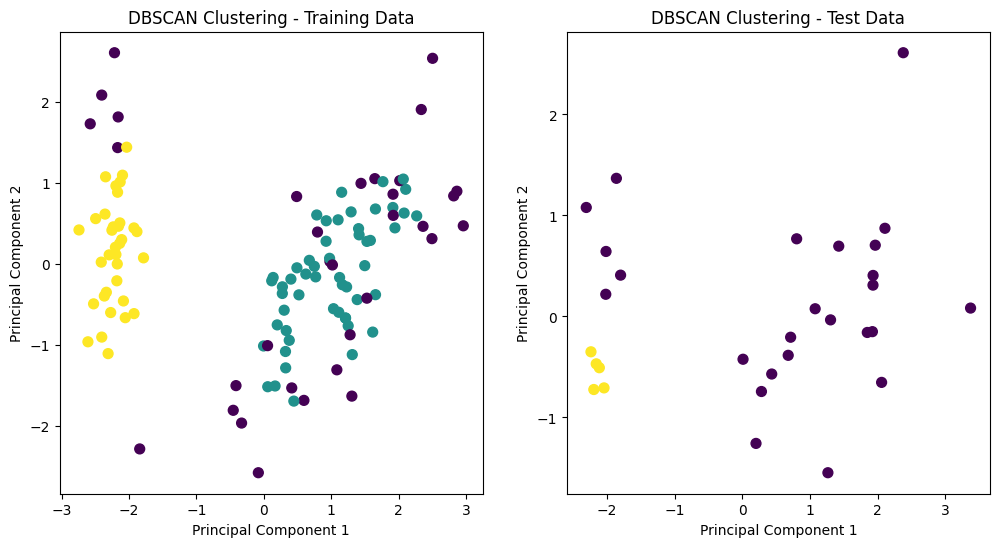

In [14]:
# Visualize the clusters for training data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=train_labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering - Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Visualize the clusters for test data
plt.subplot(1, 2, 2)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=test_labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering - Test Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

In [15]:
df_test = pd.DataFrame({'PCA1': X_test_pca[:, 0], 'PCA2': X_test_pca[:, 1], 'Cluster': test_labels})
print("Cluster Labels for Test Data:")
print(df_test)

Cluster Labels for Test Data:
        PCA1      PCA2  Cluster
0   0.679466 -0.385006       -1
1  -1.859485  1.367548       -1
2   3.374187  0.082834       -1
3   0.715433 -0.205865       -1
4   1.305286 -0.034010       -1
5  -1.797417  0.408900       -1
6   0.011888 -0.423833       -1
7   1.965792  0.705358       -1
8   1.266044 -1.547501       -1
9   0.283942 -0.743312       -1
10  1.426449  0.695911       -1
11 -2.193085 -0.723566        0
12 -2.012661  0.643338       -1
13 -2.157282 -0.469358        0
14 -2.304658  1.078999       -1
15  0.804308  0.768804       -1
16  1.932243  0.310111       -1
17  0.203600 -1.257240       -1
18  0.435910 -0.570195       -1
19  1.923710 -0.150630       -1
20 -2.235226 -0.350164        0
21  1.077754  0.076123       -1
22 -2.016340  0.219449       -1
23  1.848239 -0.158641       -1
24  2.379424  2.611309       -1
25  1.933652  0.405974       -1
26  2.059692 -0.652998       -1
27  2.109025  0.872964       -1
28 -2.042142 -0.707545        0
29 -2.1115